In [2]:
import torch
from easy_transformer import EasyTransformer

#device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'
print(f"Using {device} device")
torch.set_grad_enabled(False)

model = EasyTransformer.from_pretrained('gpt2', device=device)

# Convenience function for decoding token
decode = model.tokenizer.decode

# Convenience function for encoding token
def encode(t):
    global model
    result = model.tokenizer.encode(t)
    if len(result) != 1:
        raise Exception(f"Not a single token: {t}")
    return result[0]

unembed = model.unembed.W_U.data
embed = model.embed.W_E.data
d_M = model.cfg.d_model
d_V = model.cfg.d_vocab

unembed_norm = torch.nn.functional.normalize(unembed, dim=0)

Using cpu device
Loading model: gpt2


Using pad_token, but it is not set yet.


Moving model to device:  cpu
Finished loading pretrained model gpt2 into EasyTransformer!


In [13]:
from sklearn.cluster import BisectingKMeans

n_clusters=256
clustering = BisectingKMeans(n_clusters=n_clusters, random_state=12345)
cluster_indices = clustering.fit_predict(unembed.T)

In [4]:
from sklearn.decomposition import PCA

transformed = PCA(3).fit_transform(unembed.T)

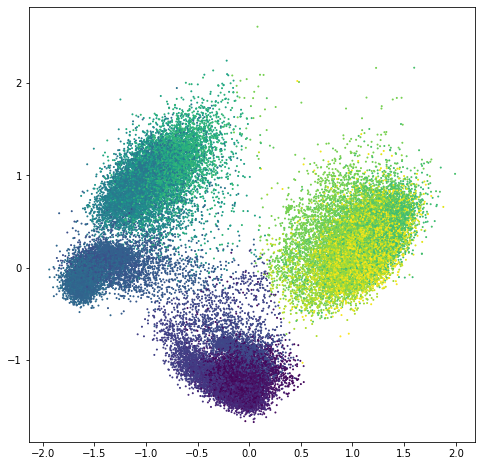

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(transformed[:,0], transformed[:,1], s=1, c=cluster_indices / (n_clusters-1))

In [22]:
from collections import defaultdict
import random
random.seed(12345)

bins = defaultdict(list)
for i in random.sample(range(d_V), 2000):
    c = cluster_indices[i]
    bins[c].append(decode(i))

def recurse(spaces, tree):
    if tree.left == None:
        print(spaces, tree.label, bins[tree.label])
    else:
        print(spaces, '.')
        recurse(spaces + ' ', tree.left)
        recurse(spaces + ' ', tree.right)
#print(clustering._bisecting_tree)
recurse('', clustering._bisecting_tree)
    
#for c in range(n_clusters):
#    print(f'+++Cluster {c}+++')
#    print(' '.join(bins[c]))

 .
  .
   .
    .
     .
      .
       0 []
       .
        .
         .
          1 [' Myers', ' Norris', ' McKenzie', ' Hilton', ' Welch', ' Sloan', ' Manning', ' Wynne', ' Durant', ' Warner', ' Murphy']
          2 [' Garfield', ' Poc', ' MacArthur', ' Gould', ' Irwin', ' Rutherford', ' Hawth']
         3 [' Snowden', ' Crowley', ' Klopp', ' Blumenthal', ' Rivera', ' Palin', ' Garcia', ' Horowitz', ' Goldberg']
        .
         .
          4 [' Doug', ' Dave', ' Nathan', ' Ryan', ' Geoff', ' Evan', ' Kelvin', ' Lindsey', ' Archie', ' James']
          5 [' Katherine', ' Audrey', ' Nancy', ' Diane', ' Gina']
         6 [' Santiago', ' Erik', ' Fritz', ' Ahmad', ' Albert', ' Lucifer', ' Franco']
      .
       .
        7 [' Syrian', ' Afghan', ' Messi', ' American', ' Rothschild', ' Soros', ' Alger', ' Euros']
        8 [' Ukraine', ' Chile', ' Latin', ' Papua', ' Netherlands', ' Niger', ' Ecuador', ' Peru', ' Ireland', ' Europa', ' Australian']
       .
        .
         9 [' B